In [1]:
import pandas as pd
import os

In [27]:
df_2012 = pd.read_csv('datasets/BPI_Challenge_2012-training.csv')

In [3]:
df_2012.head()

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0.000000e+00,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546
1,1.000000e+00,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,01-10-2011 00:38:44.880
2,2.000000e+00,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,01-10-2011 00:39:37.906
3,3.000000e+00,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,01-10-2011 00:39:38.875
4,4.294967e+09,173691,2011-10-01T08:08:58.256+02:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:08:58.256


In [4]:
#df_training.head()

In [28]:
#df_training.info()

In [29]:
#df_user1 = df_training[df_training['event org:resource'] == 'User_1']

In [30]:
#df_user1.info()

In [8]:
#df_training.set_index(['event org:resource', 'event time:timestamp'])

In [9]:
df_2012['case concept:name'].nunique()

10469

### find the most common events ###

In [18]:
df_sort = df_2012.set_index(df_2012.groupby('case concept:name').cumcount(), append = True)
df_sort#.reset_index()

,,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,0.000000e+00,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546
1,1,1.000000e+00,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,01-10-2011 00:38:44.880
2,2,2.000000e+00,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,01-10-2011 00:39:37.906
3,3,3.000000e+00,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,01-10-2011 00:39:38.875
4,0,4.294967e+09,173691,2011-10-01T08:08:58.256+02:00,5000,A_SUBMITTED,COMPLETE,01-10-2011 08:08:58.256
...,...,...,...,...,...,...,...,...
214372,96,3.883510e+13,201854,2012-01-18T02:09:07.029+01:00,50000,O_CANCELLED,COMPLETE,14-03-2012 15:30:19.361
214373,97,3.883510e+13,201854,2012-01-18T02:09:07.029+01:00,50000,A_CANCELLED,COMPLETE,14-03-2012 15:30:19.361
214374,98,3.883510e+13,201854,2012-01-18T02:09:07.029+01:00,50000,W_Nabellen incomplete dossiers,COMPLETE,14-03-2012 15:30:23.187
214375,62,3.585870e+13,199678,2012-01-10T19:16:52.800+01:00,30000,W_Nabellen offertes,START,14-03-2012 15:36:15.299


In [19]:
df_new = df_sort.groupby(level=1)["event concept:name"].transform(lambda x: x.value_counts().index[0])
df_new = df_new.to_frame()
df_new = df_new.rename(columns = {'event concept:name' : "common activity"})

In [24]:
df_sort = df_sort.join(df_new["common activity"])
#df_sort['predicted activity']

In [25]:
df_sort[df_sort['case concept:name'] == 185548]

,,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp,common activity
64935,0,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,A_SUBMITTED,COMPLETE,15-11-2011 13:42:45.593,A_SUBMITTED
64936,1,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,A_PARTLYSUBMITTED,COMPLETE,15-11-2011 13:42:45.889,A_PARTLYSUBMITTED
64938,2,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,A_PREACCEPTED,COMPLETE,15-11-2011 13:43:31.963,W_Afhandelen leads
64939,3,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,W_Completeren aanvraag,SCHEDULE,15-11-2011 13:43:32.557,W_Afhandelen leads
64989,4,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,W_Completeren aanvraag,START,15-11-2011 13:59:33.696,W_Completeren aanvraag
...,...,...,...,...,...,...,...,...,...
165456,170,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,W_Nabellen incomplete dossiers,COMPLETE,17-01-2012 10:54:42.893,W_Nabellen incomplete dossiers
165539,171,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,W_Nabellen incomplete dossiers,START,17-01-2012 11:20:51.763,W_Nabellen incomplete dossiers
165555,172,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,O_CANCELLED,COMPLETE,17-01-2012 11:25:56.714,O_CANCELLED
165556,173,1.633380e+13,185548,2011-11-15T13:42:45.592+01:00,20000,A_CANCELLED,COMPLETE,17-01-2012 11:25:56.714,A_CANCELLED


### Other stuff ###
overview of the sequence length

In [31]:
data = df_2012.groupby('case concept:name')['event time:timestamp'].count()

In [32]:
#df_2012['eventCount'] = 
df_2012.groupby('case concept:name')['event time:timestamp'].count().unstack

<bound method Series.unstack of case concept:name
173688    26
173691    39
173694    59
173697     3
173700     3
          ..
206309    47
206312     6
206315    21
206318     6
206321     3
Name: event time:timestamp, Length: 10469, dtype: int64>

In [33]:
df = pd.DataFrame(data, columns = ['event time:timestamp'])
df = df.rename(columns = {'event time:timestamp' : 'stateCount'})

In [35]:
#df.plot()

In [36]:
df = df.sort_values(by = 'stateCount', ascending = False)

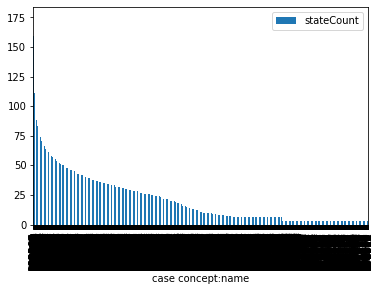

In [37]:
ax = df.plot.bar(y = 'stateCount')
ax

In [38]:
df

,stateCount
case concept:name,
185548,175
195247,170
183175,167
198232,163
181799,161
...,...
191016,3
191019,3
191034,3
